## Sistemas de recomendacion

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv(r"Hola\python-ml-course-master\datasets\ml-100k\u.data.csv", sep="\t", header=None)

In [3]:
df

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
df.columns= ["UserID", "ItemID", "Rating", "TimeStamp"]

### Análisis exploratorio de los ítems

In [5]:
import matplotlib.pyplot as plt

In [6]:
df.head()

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

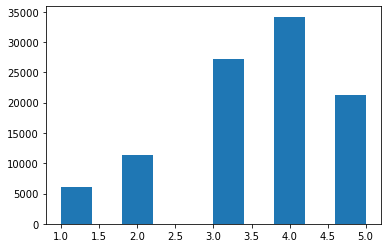

In [7]:
plt.hist(df.Rating)

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <BarContainer object of 10 artists>)

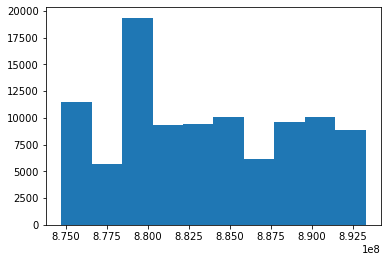

In [8]:
plt.hist(df.TimeStamp)

In [9]:
df.groupby(["Rating"])["UserID"].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

(array([560., 183.,  96.,  55.,  25.,  15.,   5.,   1.,   1.,   2.]),
 array([ 20. ,  91.7, 163.4, 235.1, 306.8, 378.5, 450.2, 521.9, 593.6,
        665.3, 737. ]),
 <BarContainer object of 10 artists>)

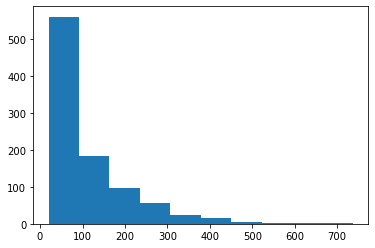

In [10]:
plt.hist(df.groupby(["UserID"])["UserID"].count())

## Representacion en forma matricial

In [11]:
import numpy as np

In [12]:
n_users= df.UserID.unique().shape[0]
n_users

943

In [13]:
n_items = df.ItemID.unique().shape[0]
n_items

1682

In [14]:
ratings = np.zeros((n_users, n_items))

In [15]:
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]

In [16]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}%".format(sparsity))

Coeficiente de sparseidad: 6.30%


## Crear conjuntos de entrenamiento y validación

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.3, random_state=42)

ratings_train.shape

(660, 1682)

ratings_test.shape

(283, 1682)

## Filtro colaborativo basado en Usuarios¶
Matriz de similaridad entre los usuarios (distancia del coseno).
Predecir la valoración desconocida de un ítem i para un usuario activo u basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.
Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores.

In [19]:
import numpy as np
import sklearn

In [20]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

type(sim_matrix)

np.ndarray

sim_matrix.shape


sim_matrix

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [21]:
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

users_predictions

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
def get_mse(preds, actuals):
    if preds.shape[0] != actuals.shape[0]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [24]:

get_mse(users_predictions, ratings_train)

7.878218313143215

## Filtrado colaborativo basado en KNN

In [25]:
from sklearn.neighbors import NearestNeighbors

In [26]:
k = 5

neighbors = NearestNeighbors(k, 'cosine')

neighbors.fit(ratings_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5, radius=cosine as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


NearestNeighbors(radius='cosine')

In [27]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)

In [28]:
top_k_distances[0]

array([ 0.        , 41.71330723, 43.3474336 , 45.04442252, 45.04442252])

In [29]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# para cada usuario del conjunto de entrenamiento
    users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

### Filtro colaborativo basado en Items

In [30]:
##Calcular similaridades en peliculas

In [31]:
n_movies= ratings_train.shape[1]
n_movies

1682

In [32]:
neighbors = NearestNeighbors(n_movies, 'cosine')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1682, radius=cosine as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [33]:
neighbors.fit(ratings_train.T)

NearestNeighbors(n_neighbors=1682, radius='cosine')

In [34]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [35]:
top_k_distances.shape

(1682, 1682)

In [36]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

In [37]:
item_preds.shape

(660, 1682)

In [38]:
get_mse(item_preds, ratings_train)


11.172565375125632